# PUNTO DE DISEÑO

Mediante este Notebook se pretende obtener el punto de diseño para el RPAS en cuestión. Se va a proceder al cálculo de la relación de Potencia eléctrica necesaria, Pe $(W)$, entre Peso de la aeronave $(N)$, en función de la Carga Alar de esta aeronave $(W/m^2)$.

Esta relación se va a obtener para la Velocidad de vuelo mínima, la Velocidad de vuelo máxima, Velocidad de crucero, Condición de entrada en pérdida, y Régimen de ascenso necesario. 



## CONDICION DE VUELO HORIZONTAL

Esta primera condición abarca las condiciones de vuelo a Velocidad mínima, Velocidad máxima y Velocidad de crucero. El equilibrio de potencias en sentido horizontal se expresa en función de parametros iniciales y datos de aviones semejantes. La ecuación correspondiente es la siguiente:

$$ \frac{P_{to}}{W_{to}} = \left(\frac{1}{2}\frac{\rho C_{D0}V^{3}}{W_{TO}/S_{w}} + \frac{2W_{TO}/S_{w}V}{\pi A \phi \rho V^{2}}\right) $$

Para la cual habrá que sustituir para el valor de V el correspondiente según la velocidad mínima, la de crucero o la máxima. En este proyecto se han definido estas velocidades como:

- Velocidad Mínima: $15 \ m/s$
- Velocidad de Crucero: $18 \ m/s$
- Velocidad Máxima: $ 22 \ m/s$
- Velocidad entrada en Pérdida: $V_{min}/1.3 = 11.54 \ m/s$

Donde además, la velocidad de crucer equivale a un $20 \%$ de la velocidad mínima de vuelo. Estos valores de velocidades se han escogido basados en los semejantes, los cuales oscilan entre estos, desde $15$ a $18 \ m/s$ para el valor de la velocidad de crucero. No obstante, siendo un modelo de tamaño ligeramente mayor, se ha acercado la velocidad a los modelos más grandes, siendo esta la de $18 \ m/s$.

## REGIMEN DE ASCENSO

El régimen de ascenso necesario marcará la potencia necesaria para poder ascender a la altitud de crucero o misión establecida en el tiempo requerido. Esto marcará el gradiente de subida mínimo que debe cumplir la aeronave para poder hacer frente a esta condición. En este caso, puesto que se trata de una aeronave monomotor, la condición de ascenso con fallo de motor se omitirá. Del mismo modo, puesto que se trata de una aeronave impulsada por baterías eléctricas, la diferencia de peso entre este régimen y el peso al despegue será nula. La relación entre la potencia necesaria y el peso de la aeronave será la siguiente:

$$ \frac{P_{to}}{W_{to}} = \frac{1}{\eta_{P}}\frac{N_{e}}{N_{e}-1}\frac{P_{to}}{P_{2}} \sqrt{\frac{2}{\rho C_{L2}}\frac{W_{to}}{S_{w}}}\left( \frac{C_{L}}{C_{D}}_{2} + \gamma_{2} \right) $$

Donde como ya se ha mencionado, $\frac{N_{e}}{N_{e-1}} = 1$, y para el caso inicial se supondrá que $\frac{P_{to}}{P_{2}} = 1$.

En este caso, se ha seleccionado un tiempo de ascenso igual a $2 \ min$ para alcanzar una altitud de misión de $100 \ m$ para la velocidad mínima de crucero de $15 \ m/s$.

## CONDICIONES INICIALES

Para el cálculo preliminar del punto de diseño se han asumido una serie de valores de basados en la bibliografía, que, una vez conocido el punto de diseño y dimensionada la aeronave, ya se podrán refinar y obtener valores más precisos.

- $g  = 9.81 \ m/s^{2}$
- $\rho = 1.225 \ kg/m^{3}$
- $ K = 0.04 $
- $ C_{D0} = 0.025 $
- $ \eta_{P} = 0.8 $
- $ \eta_{T} = 0.95 $

Para el $C_{L}$ del pérfil de la aeronave se ha recurrido a obtener la media de una serie de perfiles, bien empleados por aeronaves semejantes, pero en particular que cumplen dos condiciones. Primeramente, estos son perfiles de espesor medio o grueso, para así favorecer el confinamiento de la carga de pago en su interior. Segundo, se ha tendido a la elección de perfiles con la característica de un intrados plano o de pequeña curvatura. Esto favorece el alojamiento de la carga de pago al tener una superficie plana, o al menos el soporte diseñado para los sistemas embarcados sea mas sencillo de situar en el interior.

| ESTIMACIÓN DE $C_{LmaxTO}$| $c_{l}$ perfil | $90\% \ c_{l}$ perfil |
| :-------: | :----: | :-----: |
| NACA 4415 | 1,5425 | 1,38825 | 
| NACA 4412 | 1,6692 | 1,50228 | 
| NACA 2414 | 1,3977 | 1,25793 | 
| Clark K | 1,3848 | 1,24632 | 
| Clark V | 1,3844 | 1,24596 | 
| Clark W | 1,4317 | 1,28853 | 
| Clark X | 1,3676 | 1,23084 | 
| Clark Y | 1,294 | 1,1646 | 
| Clark Z | 1,517 | 1,3653 | 
| E344 | 1,48 | 1,332 | 
| Boeing 106 | 1,4652 | 1,31868 | 
| GOE 593 | 1,4243 | 1,28187 | 
| E793 | 1,6809 | 1,51281 | 
| N22 | 1,5561 | 1,40049 | 
| DF102 | 1,4138 | 1,27242 |
| |       $\overline{C_{LmaxTO}}$ | 1,32 | 



### Importando librerias

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
from scipy.optimize import fsolve
import random
%matplotlib inline

In [55]:
def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)

hide_toggle()

### Iniciando los valores inciales

In [4]:
CI = {'g':9.81,
     'rho':1.225,
     'K':0.04,
     'Cdo':0.025,
     'np':0.8,
     'nt':0.95,
     'cl':1.320552}

### Iniciando los valores de diseño

In [5]:
# Parámetros de vuelo horizontal/misión

Vmin = 15
Vc   = Vmin*1.2
Vmax = 22
Vs   = Vmin/1.3

V  = {'Vmin':Vmin,
     'Vc':Vc,
     'Vmax':Vmax}


# Parámetros de régimen de ascenso

t     = 2
alt   = 100

### Definción de la función de velocidad horizontal

In [155]:
def vhorizontal(W,V,CI):
    T1   = 0.5*(CI['rho']*CI['Cdo']*(V**3))/W
    T2   = 2*W*CI['K']/(CI['rho']*V)
    Pt   = T1 + T2
    Pe   = Pt/(CI['nt']*CI['np'])
    return Pe

### Definición de la función de régimen de ascenso


In [141]:
def rascenso(W,V,t,alt,CI):
    gamma = alt/(t*V*60)
    Pt    = np.sqrt(2*W/(CI['rho']*CI['cl']*0.9))*(gamma+CI['Cdo']*1.1/(CI['cl']*0.9))
    Pe    = Pt/(CI['nt']*CI['np'])
    return Pe

### Cálculo de la Condición de entrada en pérdida

In [8]:
def perdida(CI,Vs):
    Pto = 0.5*CI['rho']*CI['cl']*(Vs**2) 
    return Pto

# Representación del punto de diseño

In [81]:
def plotPe(W,Vmin,Vc,Vmax,Pa,Pper):
    
    WPer = np.array([Pper,Pper])
    PPer = np.array([0,25])
    
    
    fig = plt.figure();
    ax = fig.add_axes([0, 0, 1, 1]);
    ax.set_xlim((0, 250))
    ax.set_ylim((0, 20))
    ax.set_xlabel('$ W/S_w \ [N/m^2]$')
    ax.set_ylabel('$ P_e/W \ [W/N]$')
    ax.grid(True)
    
    ax.plot(W, Vmin, '-',label='Crucero 15 m/s')  
    ax.plot(W, Vc, '-',label='Crucero 18 m/s')
    ax.plot(W, Vmax, '-',label='Crucero 22 m/s')
    ax.plot(W, Pa, '-',label='Regimen de ascenso')
    plt.plot(WPer,PPer,'-',label='Condición de pérdida')
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 1.5,box.height*1.5])
    ax.legend()
    
    fig2 = plt.figure();
    ax2 = fig2.add_axes([0, 0, 1, 1]);
    ax2.set_xlim((0, 140))
    ax2.set_ylim((0, 5))
    ax2.set_xlabel('$ W/S_w \ [N/m^2]$',fontsize=20)
    ax2.set_ylabel('$ P_e/W \ [W/N]$',fontsize=20)
    ax2.grid(True)
    
    ax2.plot(W, Vmin, '-',label='Crucero 15 m/s')  
    ax2.plot(W, Vc, '-',label='Crucero 18 m/s')
    ax2.plot(W, Vmax, '-',label='Crucero 22 m/s')
    ax2.plot(W, Pa, '-',label='Regimen de ascenso')
    plt.plot(WPer,PPer,'-',label='Condición de pérdida')
    box = ax2.get_position()
    ax2.set_position([box.x0, box.y0, box.width * 1.5,box.height*1.5])
    ax2.legend()
    
    fig3 = plt.figure();
    ax3 = fig3.add_axes([0, 0, 1, 1]);
    ax3.set_xlim((0, 140))
    ax3.set_ylim((0, 5))
    ax3.set_xlabel('$ W/S_w \ [N/m^2]$',fontsize=20)
    ax3.set_ylabel('$ P_e/W \ [W/N]$',fontsize=20)
    ax3.grid(True)
    ax3.plot(W, Vmin, '-',label='Crucero 15 m/s')  
    ax3.plot(W, Vc, '-',label='Crucero 18 m/s')
    ax3.plot(W, Vmax, '-',label='Crucero 22 m/s')
    ax3.plot(W, Pa, '-',label='Regimen de ascenso')
    plt.plot(WPer,PPer,'-',label='Condición de pérdida')
    plt.text(Pper+1,3,r'$\frac{W}{S_w} = $ %5.2f'%(Pper),fontsize=20)
    box = ax2.get_position()
    ax3.set_position([box.x0, box.y0, box.width * 1.5,box.height*1.5])
    ax3.legend()


hide_toggle()

### Cálculo de las potencias necesarias

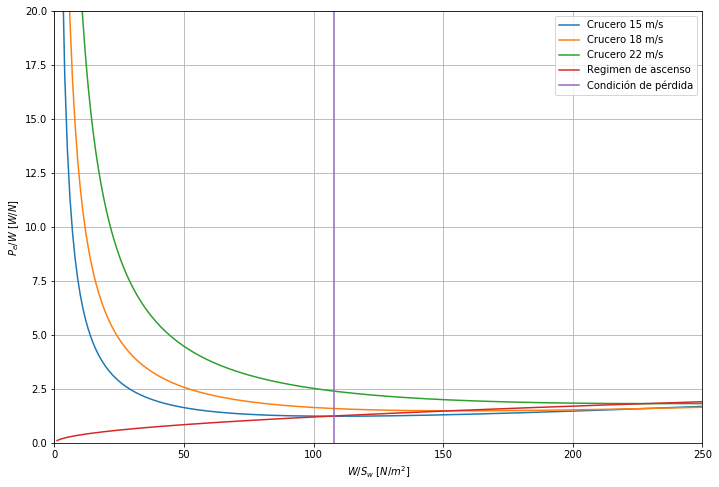

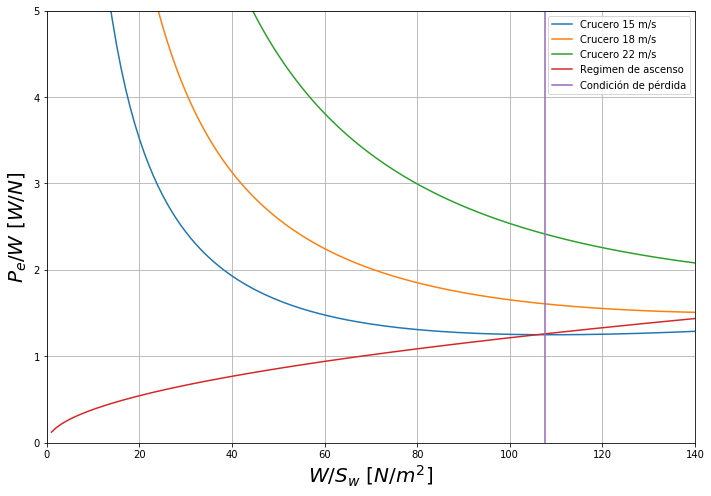

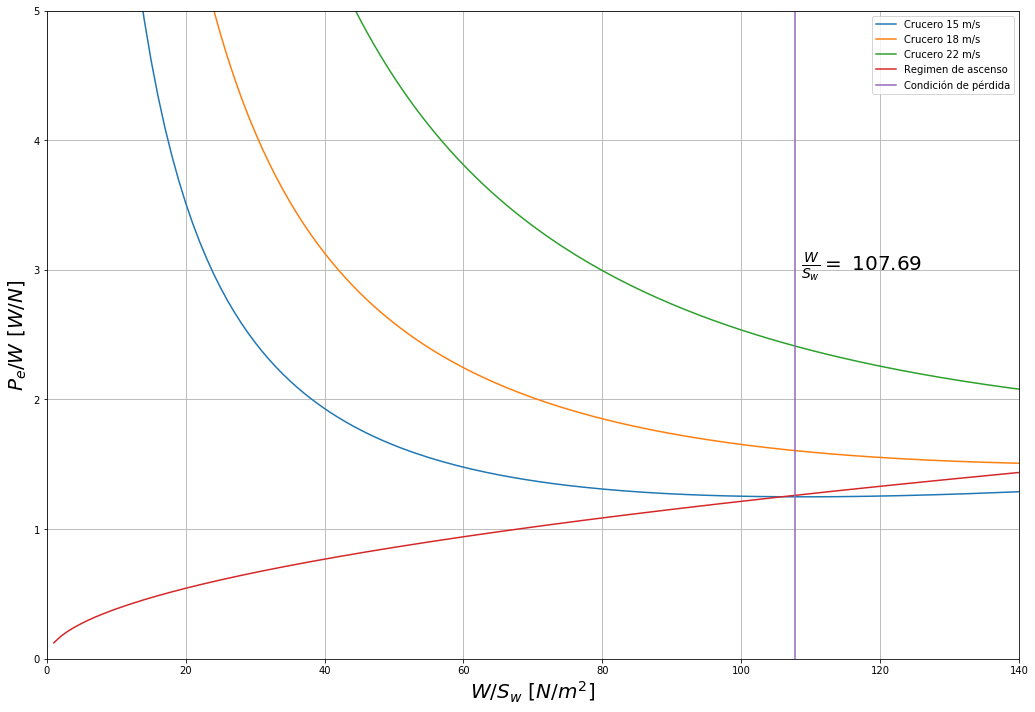

In [172]:
WtoS = np.arange(1,251)
Pemin = vhorizontal(WtoS,Vmin,CI)
PeC   = vhorizontal(WtoS,Vc,CI)
PeMax = vhorizontal(WtoS,Vmax,CI)
Pa    = rascenso(WtoS,Vmin,t,alt,CI)
Wper  = perdida(CI,Vs)

plotPe(WtoS,Pemin,PeC,PeMax,Pa,Wper)

### Intersección de las restricciones

In [221]:
Pmina = np.argwhere(np.diff(np.sign(Pemin - Pa)))
Pca = np.argwhere(np.diff(np.sign(PeC - Pa)))
Pamin = Pemin[Pmina].item(0)
Pcper = PeC[round(Wper)]
Pminper = Pemin[round(Wper)]
Pcmina = PeC[Pmina].item(0)
print('La carga alar máxima para que la aeronave no entre en pérdida será: %5.2f N/m^2'%(Wper))
print('Para esta carga alar, la potencia en el eje mínima por unidad de peso es de: %5.2f W/N'%(Pcper))
print('La condición de régimen de ascenso para velocidad mínima establece una carga alar máxima de: %5.0f N/m^2'%(WtoS[Pmina.item(0)]))
print('Así mismo, esta condición establece que la potencia en el eje mínima sea de: %5.2f W/N'%(Pamin))
print('Y la potencia en el eje para la velocidad de crucero será de: %5.2f W/N'%(Pcmina))

hide_toggle()

La carga alar máxima para que la aeronave no entre en pérdida será: 107.69 N/m^2
Para esta carga alar, la potencia en el eje mínima por unidad de peso es de:  1.60 W/N
La condición de régimen de ascenso para velocidad mínima establece una carga alar máxima de:   105 N/m^2
Así mismo, esta condición establece que la potencia en el eje mínima sea de:  1.25 W/N
Y la potencia en el eje para la velocidad de crucero será de:  1.62 W/N


Se comprueba por tanto a través de la representación anterior que el límite para que la aeronave no entre en pérdida es de $107.69 \ [N/m^2]$. Sin embargo, para esta condición no se cumple la condición de régimen de ascenso para velocidad mínima de crucero. Por tanto, se opta por una carga alar inferior a la límite que cumpla estas dos condiciones. Siendo la límite por tanto la carga alar de $105 \ [N/m^2]$, para la cual, la potencia en el eje será de $1.62 \ [W/N]$  